#### Description: Functions to analyse timeseries on their spetrum.
#### Author:      Tim Sieker
#### E-mail:      timsieker@gmail.com

In [1]:
from spectrum import *
import numpy as np

In [2]:
### import 1d time series of NAO index
nlag = 100
idx = int(nlag / 2)
NAO = np.loadtxt('norm.nao.monthly.b5001.current.ascii.txt')
NAO_year = NAO[:,0]
NAO_month = NAO[:,1]
NAO_time = (NAO_year - 1950)*12 + NAO_month ## in months since 1950
NAO_data = NAO[:,2]
N = len(NAO_data)

### let's corrupt the data with nans und delete time steps

NAO_data_corrupted = np.delete(NAO_data, [10,31,78,111]) # these timesteps will be deleted
NAO_time_corrupted = np.delete(NAO_time, [10,31,78,111]) # these timesteps will be deleted

mask_nan = np.zeros(NAO_data_corrupted.shape).astype(bool)
mask_nan[[50,120,332,471]] = True # these timesteps will be set to nan

NAO_data_corrupted[mask_nan] = np.nan


(881,)


Check data on missing values, uneven time steps or unrealistic values

In [3]:
check_data(NAO_data_corrupted, t=NAO_time_corrupted)

/home/jovyan/my_materials/climvar.py:19: UserWarning: Nans detected in data. Perform interpolation.
  warnings.warn('Nans detected in data. Perform interpolation.')
/home/jovyan/my_materials/climvar.py:28: UserWarning: Uneven timesteps detected in data. Perform interpolation on a new time array (t_new).
  warnings.warn('Uneven timesteps detected in data. Perform interpolation on a new time array (t_new).')


Nans and uneven timesteps were detected, so we need to interpolate.

In [4]:
NAO_time_restored, NAO_data_restored = interpolate(NAO_data_corrupted, t=NAO_time_corrupted, t_new=NAO_time)

check_data(NAO_data_restored, t=NAO_time_restored)

(881,)
Everything is looking good


Now we can go ahead and do the analysis.

In [5]:
freq, NAO_spect = spectrum(NAO_data_restored, ft_method='fft')

_, NAO_spect_rn = red_noise(NAO_data_restored)
_,NAO_spect_wn = white_noise(NAO_data_restored)

NAO_spect_rn_99n, NAO_spect_rn_99p = noise_ci(NAO_spect_rn, q=0.05)

And make a simple plot:

Text(0, 0.5, 'Spectral Variance')

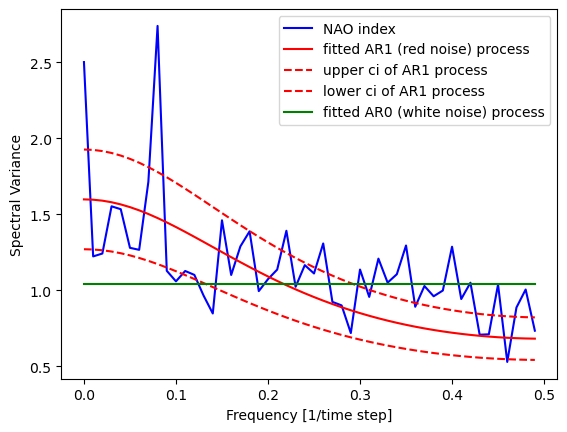

In [6]:
plt.plot(freq[:idx], NAO_spect[:idx], 'blue', label='NAO index')
plt.plot(freq[:idx], NAO_spect_rn[:idx], 'r', label='fitted AR1 (red noise) process')
plt.plot(freq[:idx], NAO_spect_rn_99p[:idx], 'r--', label='upper ci of AR1 process')
plt.plot(freq[:idx], NAO_spect_rn_99n[:idx],'r--', label='lower ci of AR1 process')
plt.plot(freq[:idx], NAO_spect_wn[:idx],'green', label='fitted AR0 (white noise) process')
plt.legend()

plt.xlabel('Frequency [1/time step]')
plt.ylabel('Spectral Variance')